In [1]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np 

In [2]:
chemin_image = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"

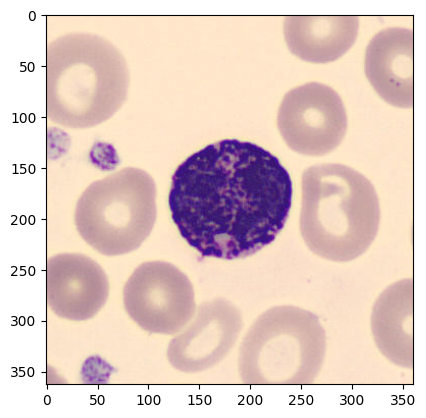

In [22]:
image = mpimg.imread(chemin_image)
plt.imshow(image)
plt.show()

## Niveau de gris sur toute l'image 

In [23]:
from PIL import Image
import numpy as np

def niveau_gris_moyen(image_path):
    # Ouvrir l'image
    image = Image.open(image_path)
    
    # Convertir l'image en niveaux de gris
    image_gray = image.convert('L')
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image_gray)
    
    # Calculer le niveau de gris moyen
    mean_gray = np.mean(image_np)
    
    return mean_gray

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"  # Remplacez par le chemin de votre image
niveau_moyen = niveau_gris_moyen(image_path)
print(f"Niveau de gris moyen: {niveau_moyen}")

Niveau de gris moyen: 201.89163605754516


## Niveau de gris dans l'image sueillée 

In [24]:
from PIL import Image
import numpy as np

# Ouvrir l'image
image = Image.open("/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg")

# Convertir l'image en niveaux de gris
image_grayscale = image.convert('L')

# Définir le seuil
seuil = 130

# Appliquer le seuillage sur l'image en niveaux de gris
image_seuillee = image_grayscale.point(lambda x: 0 if x < seuil else 255)

# Convertir l'image seuilée en tableau numpy
image_np = np.array(image_seuillee)

# Calculer le niveau de gris moyen de l'image seuilée
mean_gray_seuillee = np.mean(image_np)

print(f"Niveau de gris moyen de l'image seuilée : {mean_gray_seuillee}")

Niveau de gris moyen de l'image seuilée : 234.15197428833793


In [8]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 33.6 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Comptage des petits contours image centrale 

Le nombre de contours dans l'image centrale est : 11


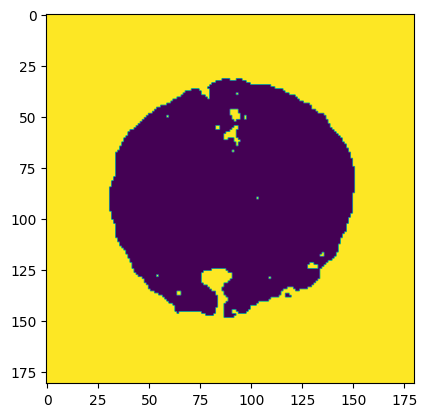

In [49]:
import numpy as np
from PIL import Image
from scipy import ndimage

def decouper_centre(image_np, proportion=0.5):
    """
    Découpe la partie centrale de l'image en fonction de la proportion spécifiée.
    La proportion doit être comprise entre 0 et 1.
    """
    h, w = image_np.shape
    centre_h = int(h * proportion)
    centre_w = int(w * proportion)
    debut_h = (h - centre_h) // 2
    debut_w = (w - centre_w) // 2
    return image_np[debut_h:debut_h + centre_h, debut_w:debut_w + centre_w]

def compter_contours(image_path, seuil=130, proportion=0.5):
    # Ouvrir l'image et convertir en niveaux de gris
    image = Image.open(image_path).convert('L')
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image)
    
    # Découper la partie centrale de l'image
    image_centre = decouper_centre(image_np, proportion)
    
    # Appliquer le seuillage
    image_seuillee = (image_centre > seuil).astype(np.uint8) * 255
    
    # Trouver les contours en utilisant les différences de gradients
    sx = ndimage.sobel(image_seuillee, axis=0, mode='constant')
    sy = ndimage.sobel(image_seuillee, axis=1, mode='constant')
    sobel = np.hypot(sx, sy)
    
    # Binariser le résultat du filtre Sobel
    contours = (sobel > 0).astype(np.uint8)
    
    # Étiqueter les objets (contours)
    labeled_array, num_features = ndimage.label(contours)
    
    return num_features, image_seuillee

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"
try:
    nombre_contours, image_seuillee = compter_contours(image_path, seuil=130, proportion=0.5)
    print(f"Le nombre de contours dans l'image centrale est : {nombre_contours}")
    

except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"Une erreur s'est produite : {e}")
plt.imshow(image_seuillee)
plt.show()

## Comptage des gros contours image centrale 

In [47]:
import numpy as np
from PIL import Image
from scipy import ndimage

def decouper_centre(image_np, proportion=0.5):
    """
    Découpe la partie centrale de l'image en fonction de la proportion spécifiée.
    La proportion doit être comprise entre 0 et 1.
    """
    h, w = image_np.shape
    centre_h = int(h * proportion)
    centre_w = int(w * proportion)
    debut_h = (h - centre_h) // 2
    debut_w = (w - centre_w) // 2
    return image_np[debut_h:debut_h + centre_h, debut_w:debut_w + centre_w]

def compter_gros_contours(image_path, seuil=130, proportion=0.5, aire_min=100):
    # Ouvrir l'image et convertir en niveaux de gris
    image = Image.open(image_path).convert('L')
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image)
    
    # Découper la partie centrale de l'image
    image_centre = decouper_centre(image_np, proportion)
    
    # Appliquer le seuillage
    image_seuillee = (image_centre > seuil).astype(np.uint8) * 255
    
    # Trouver les contours en utilisant les différences de gradients
    sx = ndimage.sobel(image_seuillee, axis=0, mode='constant')
    sy = ndimage.sobel(image_seuillee, axis=1, mode='constant')
    sobel = np.hypot(sx, sy)
    
    # Binariser le résultat du filtre Sobel
    contours = (sobel > 0).astype(np.uint8)
    
    # Étiqueter les objets (contours)
    labeled_array, num_features = ndimage.label(contours)
    
    # Filtrer les contours par leur aire
    areas = ndimage.sum(contours, labeled_array, range(1, num_features + 1))
    gros_contours = areas > aire_min
    nombre_gros_contours = np.sum(gros_contours)
    
    return nombre_gros_contours, image_seuillee

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"
try:
    nombre_gros_contours, image_seuillee = compter_gros_contours(image_path, seuil=130, proportion=0.5, aire_min=100)
    print(f"Le nombre de gros contours dans l'image centrale est : {nombre_gros_contours}")

except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Le nombre de gros contours dans l'image centrale est : 3


## Comptage de pixels au dessus du seuil

In [42]:
from PIL import Image
import numpy as np

def compter_pixels_sup_seuil(image_path, seuil=130):
    # Ouvrir l'image en niveaux de gris
    image = Image.open(image_path).convert('L')
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image)
    
    # Appliquer le seuillage (si l'image n'est pas encore seuillée)
    image_seuillee = (image_np > seuil).astype(np.uint8) * 255
    
    # Compter le nombre de pixels au-dessus du seuil
    nombre_pixels_sup_seuil = np.sum(image_seuillee > 0)
    
    return nombre_pixels_sup_seuil

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/BA_47.jpg"
try:
    nombre_pixels_sup_seuil = compter_pixels_sup_seuil(image_path, seuil=130)
    print(f"Nombre de pixels au-dessus du seuil dans l'image : {nombre_pixels_sup_seuil}")
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"Une erreur s'est produite : {e}")


Nombre de pixels au-dessus du seuil dans l'image : 119960


In [43]:
from PIL import Image
import numpy as np

def compter_pixels_sup_seuil(image_path, seuil=130):
    # Ouvrir l'image en niveaux de gris
    image = Image.open(image_path).convert('L')
    
    # Convertir l'image en tableau numpy
    image_np = np.array(image)
    
    # Appliquer le seuillage (si l'image n'est pas encore seuillée)
    image_seuillee = (image_np > seuil).astype(np.uint8) * 255
    
    # Compter le nombre de pixels au-dessus du seuil
    nombre_pixels_sup_seuil = np.sum(image_seuillee > 0)
    
    return nombre_pixels_sup_seuil

# Exemple d'utilisation
image_path = "/Users/simonboudara/dataset/PBC_dataset_normal_DIB/neutrophil/BNE_55624.jpg"
try:
    nombre_pixels_sup_seuil = compter_pixels_sup_seuil(image_path, seuil=130)
    print(f"Nombre de pixels au-dessus du seuil dans l'image : {nombre_pixels_sup_seuil}")
except FileNotFoundError as e:
    print(e)
except Exception as e:
    print(f"Une erreur s'est produite : {e}")

Nombre de pixels au-dessus du seuil dans l'image : 125180
